# **Digital Signal and Image Management - Assignement 3**<br/>

**Master's Degree in Data Science (A.Y. 2024/2025)**<br/>
**University of Milano - Bicocca**<br/>

Student: Sara **Nava**, mat. **870885**

## **Assignement Description**

**Introduction of YCbCr color space**
* YCbCr is another color space that separates a brightness-like component (Luma) from the color components (Chroma).
* The colors are encoded as:
  * Cb: a high value indicates blue, a low value indicates its opposite yellow.
  * Cr: a high value indicates red, a low value indicates its opposite green.
* It is used, for example, in the JPEG compression.
  * Note that this is transparent to us: when we import a jpg image using `imread`, this gets decompressed and converted in RGB automatically.

References [here](https://en.wikipedia.org/wiki/YCbCr#CbCr).

**Image compression based on colors representation**

* Our human visual system is more sensitive to details/changes in brightness, and much less sensitive to details/changes in color.
* This is at the core of many compression algorithms:
  * They reduce the amount of information that encodes color
  * This translates to a smaller file size
  * There is little negative impact on the final quality of the image
* For the assignement, we will use Gaussian blur as a technique to reduce the amount of information.
  * This is not what JPEG does, and it does not necessarily translate to a smaller file size, but it easily illustrates the concept.
  * For the purpose of the assignement, you are not expected to save the images and evaluate the file size.


**Approach**:

1. Choose a new image, different from the ones used in this notebook
2. Convert it into YCbCr color space
3. Blur Cb and Cr channels using a wide gaussian filter
4. Visualize each channel of the YCbCr, and the resulting rebuilt RGB image
5. Blur only the Y channel (and keep the original Cb and Cr)
6. Visualize each channel of the YCbCr, and the resulting rebuilt  image

You *must* test (and show) different sizes of the gaussian filter to appreciate the degree of tolerance of the human eye to color compression.


**Hint**:
* If you observe unexpected results, pay attention to the `multichannel` or the `channel_axis` parameter in the gaussian transformation, and to the data type.


**Rules**:
- Use a custom image (different from the ones provided).
- Show the effect of blurring only the luma channel, and the effect of blurring only the chroma channels.
- Experiment with, and show, the impact of blurring with visibly different intensities.
- For the purpose of the assignment, you are not expected to save the images and evaluate the file size.
- You can (and should) use ready-made functions for the color conversion and for the gaussian filtering.


## **Import packages**
Import main packages:

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Image management
from skimage import io # Input/output
from skimage import transform # Geometric transformations (e.g. resize)
from skimage import filters # Local processing
from skimage import color # Change of color space
from google.colab.patches import cv2_imshow

# Set visualization size for figures (notebook only)
plt.rcParams['figure.figsize'] = [15,5] # width, height

# Link Google Drive account
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Moreover, define the personal directory path located in Google Drive where find materials:

In [ ]:
my_dir_path = 'gdrive/My Drive/Digital Signal and Image Management'

## **Load Data**
Download the image on which work from this [link](https://images.app.goo.gl/M5QgLbhkc1TCjR7ZA). Eventually, it is possible to retrieve it from this [Google Drive folder](https://drive.google.com/drive/folders/175I0YRfyLuzgqfVACGBTSmvyc4TOdj_t?usp=drive_link) (file: `image_assignement3.jpg`).

Then import it:

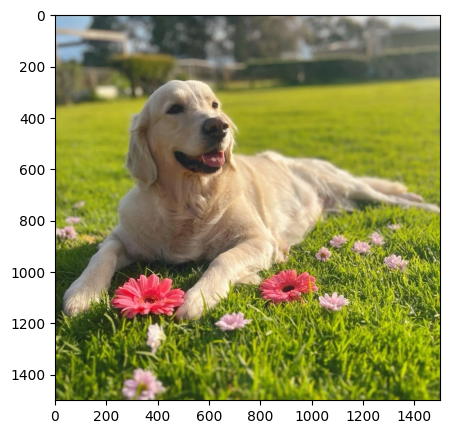

In [ ]:
# Import image with skimage, and visualize with matplotlib
im = io.imread(f'{my_dir_path}/Material/image_assignement3.jpg')
# im = io.imread(f'{my_dir_path}/Material/redpanda.png')
plt.imshow(im); plt.show()

In [ ]:
im.shape

(1500, 1500, 3)

The image has dimensions of **1500x1500 pixels** with **3 channels**, indicating it's a square RGB image with a high resolution.

## **Blur Blue and Red Chrominance Components (Cb and Cr)**

This step of the assignement requires to:
- **Convert the image to `YCbCr` color space**: transform the given image from the RGB color space into the YCbCr color space. This separation allows independent manipulation of brightness and color information.
- **Apply Gaussian Blur to Chrominance Channels**: use a wide Gaussian filter to blur the Cb (blue-difference) and Cr (red-difference) channels. This operation smooths color details, which is often used for image compression or denoising while preserving luminance.
- **Visualize Intermediate and Final Results**: display each of the three YCbCr channels (Y, Cb, Cr) to understand the effects of the transformation and filtering. Rebuild the image by converting the processed YCbCr back to RGB color space, and visualize the final result.

For blurring the Cb and Cr channels, the `gaussian_filter` function is available in [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html) API:

In [ ]:
from scipy.ndimage import gaussian_filter

In [ ]:
def compress_CbCr(im, sigma):
  # YCbCr Conversion
  im_YCbCr = color.rgb2ycbcr(im[:,:,0:3])

  # Components Decomposition
  Y = im_YCbCr[:,:,0]
  Cb = im_YCbCr[:,:,1]
  Cr = im_YCbCr[:,:,2]

  # Compose Blurred Image
  im_blur = np.dstack((Y,
                       gaussian_filter(Cb, sigma), # Apply Gaussian Filter on Cb component
                       gaussian_filter(Cr, sigma))) # Apply Gaussian Filter on Cr component

  # Convert YCbCr to RGB
  im_out = color.ycbcr2rgb(im_blur)

  # Correction
  im_out = np.clip(im_out, 0, 1)

  return im_out

The `compress_CbCr` function is designed to **reduce color details** in an image by **blurring** the **chrominance components** (Cb and Cr) in the YCbCr color space. Here's a brief description of what the function does:

1. **Convert RGB to YCbCr**:  
   The input image (`im`) is converted from the RGB color space to the YCbCr color space.

2. **Decompose Components**:  
   The YCbCr image is split into its three individual components: **Y** (brightness), **Cb** (blue-difference chrominance), **Cr** (red-difference chrominance).

3. **Apply Gaussian Blur to Chrominance Channels**:  
   A **Gaussian filter** with a specified `sigma` value is applied to the Cb and Cr channels to smooth (blur) the color information. The Y channel remains unchanged to preserve brightness details.

4. **Rebuild the YCbCr Image**:  
   The blurred chrominance channels (Cb and Cr) are recombined with the unaltered Y channel to form a new YCbCr image.

5. **Convert Back to RGB**:  
   The modified YCbCr image is converted back to the RGB color space to produce the output image (`im_out`).

6. **Clip Values**:  
   To ensure valid pixel values, the output image is clipped to the range `[0, 1]`. Without the application of `clip` function, the following warning emerges:

        WARNING:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

        


Apply the compression function to the Cb and Cr channels using a **Gaussian filter** with a **sigma value** of $20$. This sigma value controls the intensity of the blur applied within the function.

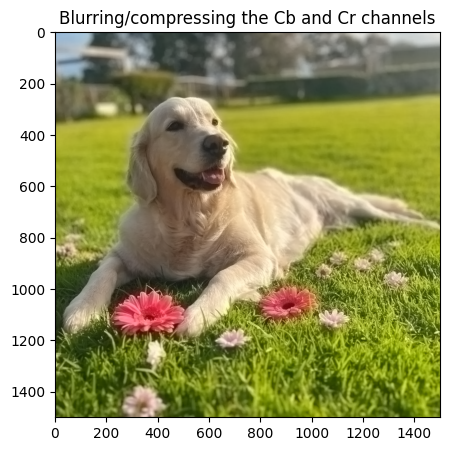

In [ ]:
# Apply compression function to the image and print results
im_CbCrblur = compress_CbCr(im, 20)
plt.title('Blurring/compressing the Cb and Cr channels')
plt.imshow(im_CbCrblur)

The difference from the original image might not be immediately noticeable. To make it more apparent, compare the two images directly:

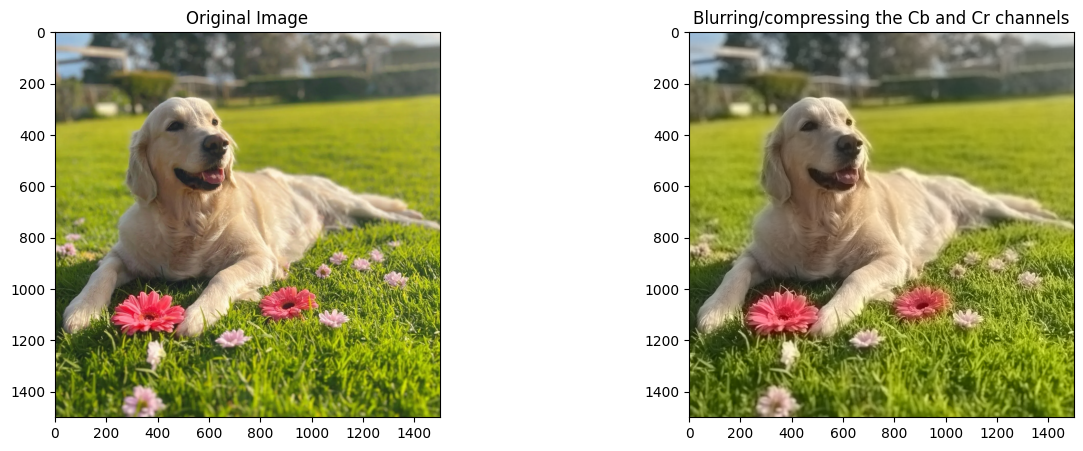

In [ ]:
# Print the original image
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(im)

# Print the blurred image
plt.subplot(1,2,2)
plt.title('Blurring/compressing the Cb and Cr channels')
plt.imshow(im_CbCrblur)

With the two images displayed side by side, the differences become clearer. Focusing in particular on the **flowers**, which are the most contrasting color element in the image, it’s noticeable that the compression of the Cb and Cr components has resulted in **duller colors**. Moreover, what cames out is especially the visible **color gradients around the flowers**, an effect not present in the original image.

For the **smaller, lighter flowers**, the pink hue almost turns to white, losing nearly all of its chromatic component. Similarly, the **dog's tongue**, which shares colors with the larger flowers, loses its vibrancy, shifting toward a duller pink.

Even though less noticeable, the **dog's fur** shows a subtle loss of its golden tone, appearing slightly more muted.

As for the **grass** and **background**, the compression effect is almost imperceptible. However, upon closer inspection of the **hedge in the background**, particularly around the dog’s head, there is a noticeable loss of the yellowish hue present in the original image, making the hedge appear more uniform in color with the rest of the shrub.

Overall, the compression effect is more **noticeable in areas with vivid or contrasting tones**, while it remains less perceptible in areas with more uniform or less saturated colors. It would be interesting to assess the effect of this compression by varying the sigma value of the Gaussian filter.

Now, visualize a 2x2 window, displaying the blurred image decomposed in its YCbCr components.

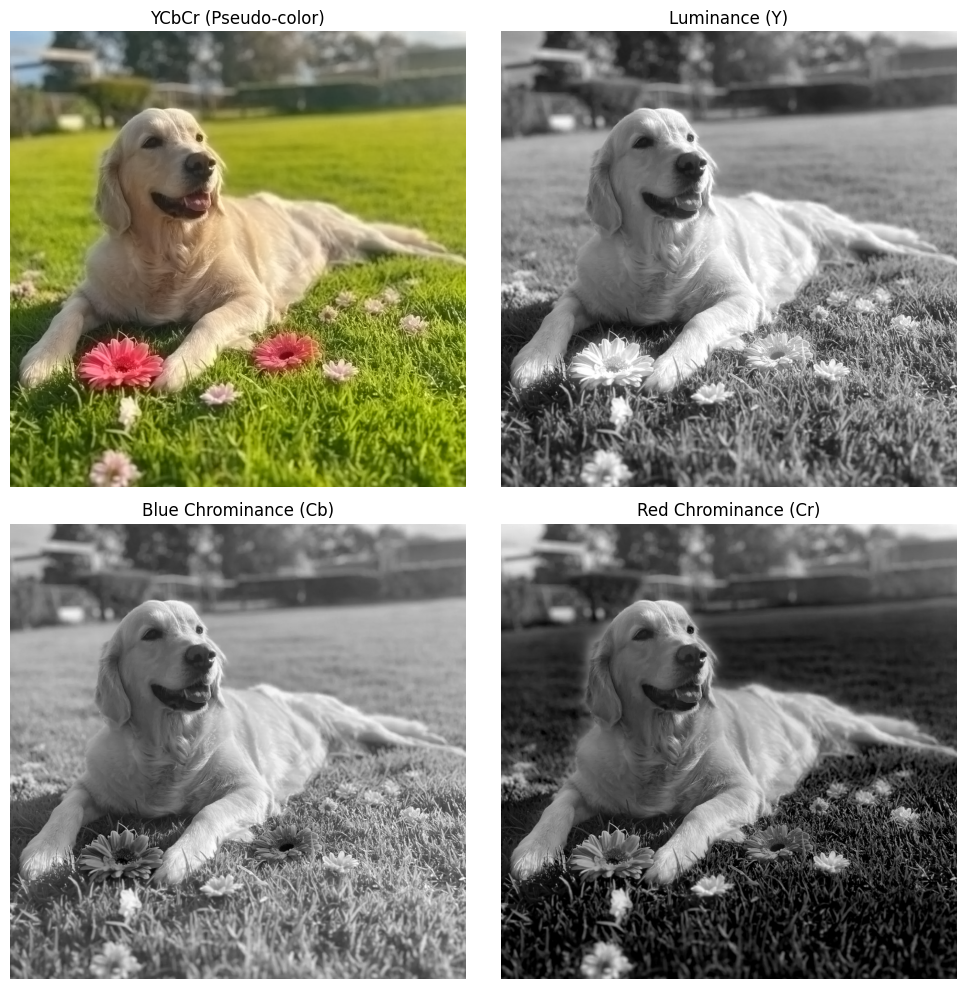

In [ ]:
# Separate channels
Y_channel = im_CbCrblur[:, :, 0]
Cb_channel = im_CbCrblur[:, :, 1]
Cr_channel = im_CbCrblur[:, :, 2]

# Display the YCbCr image (pseudo-color)
plt.figure(figsize=(10, 10))

# Pseudo-color full YCbCr image
plt.subplot(2, 2, 1)
plt.imshow(im_CbCrblur)
plt.title("YCbCr (Pseudo-color)")
plt.axis("off")

# Display Y channel
plt.subplot(2, 2, 2)
plt.imshow(Y_channel, cmap='gray')
plt.title("Luminance (Y)")
plt.axis("off")

# Display Cb channel
plt.subplot(2, 2, 3)
plt.imshow(Cb_channel, cmap='gray')
plt.title("Blue Chrominance (Cb)")
plt.axis("off")

# Display Cr channel
plt.subplot(2, 2, 4)
plt.imshow(Cr_channel, cmap='gray')
plt.title("Red Chrominance (Cr)")
plt.axis("off")

plt.tight_layout()
plt.show()

**Top-left (YCbCr Pseudo-color)**: This is the final output after applying the chrominance blur. The image appears less saturated, with colors looking more muted, but the structure and details are preserved, as already described.

**Top-right (Luminance - Y)**: This grayscale image shows the brightness information only. Since the function didn't blur this channel, the details remain sharp, meaning most of the edges and textures are still intact. The gradient effect around flowers (previously mentioned) can be noticed.

When the chrominance components Cb and Cr are separated, the representation and perception of colors become more apparent. The Cb channel encodes the difference between blue and yellow tones, while the Cr channel encodes the difference between red and green tones. In their grayscale representation:
- **Cb channel**: Areas dominated by blue tones (e.g., sky or shadows) appear brighter, while areas with stronger yellow tones (e.g., foliage or warm highlights) appear darker.
- **Cr channel**: Areas with stronger red tones (e.g., flowers or warm highlights) are brighter, while regions with dominant green tones (e.g., grass or vegetation) appear darker.
For instance, in this specific image, the grass appears lighter in the Cb channel because green contains contributions from both blue and yellow. Conversely, in the Cr channel, the grass appears darker since green is located opposite red in this chrominance space, emphasizing the difference.

When a **Gaussian blur** is applied to either channel, its effects are particularly noticeable in regions with high chromatic contrast between tones represented by that channel. In this analyzed image:
- **Bottom-left (Blue Chrominance - Cb)**: The *blurring effect is minimal*, as there is little contrast between blue and yellow tones in the scene. The resulting grayscale representation shows only subtle gradient effects around borders, and no colors effects emerged as in the RGB image. Due to the lack of strong blue or yellow contrasts, the blurring is difficult to perceive, and changes are even harder to distinguish in the grayscale representation.
- **Bottom-right (Red Chrominance - Cr)**: The *blurring effect is more evident*, particularly around objects with contrasting red and green tones. For example, flowers (with high red content) stand out against the grass (dominated by green). The **Gaussian filter smooths** these **high-contrast regions**, creating noticeable **gradients along edges**. Additionally, the dog's blonde fur contrasts with the green grass, further highlighting the gradients in the Cr channel, even though this effect is less pronounced in the RGB version of the image.


Try to apply different values of sigma within the gaussian filter, using the slider:

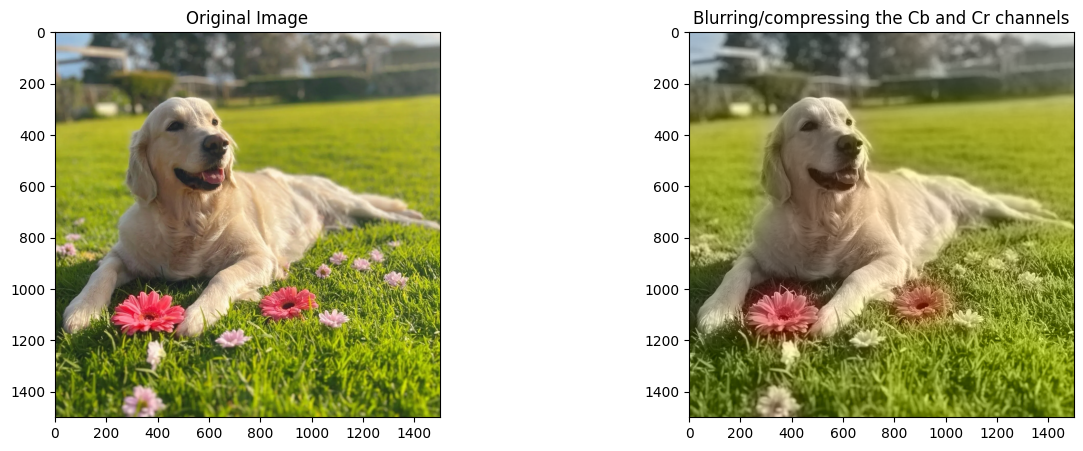

In [ ]:
# @title  {"run":"auto"}
# Blur image
sigma = 51 #@param {type:"slider", min:0, max:60, step:3}
plt.subplot(1,2,2)
plt.title('Blurring/compressing the Cb and Cr channels')
plt.imshow(compress_CbCr(im, sigma))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(im)

It can be observed that for **sigma values approaching zero**, the **image** remains **almost** **unchanged**. However, as the **sigma** value of the Gaussian filter **increases**, the **blurring effect becomes more pronounced**. The colors appear more muted, and the blur around the larger flowers becomes even more noticeable.

Furthermore, it can be observed that the lower part of the dog's body exhibits a greenish tint along the edges of its fur, blending and merging with the green grass background. This effect highlights the impact of the Gaussian blur, making it more noticeable, whereas it was previously subtle and harder to perceive.

Then, a sequence of the same images with increasing values of sigma:

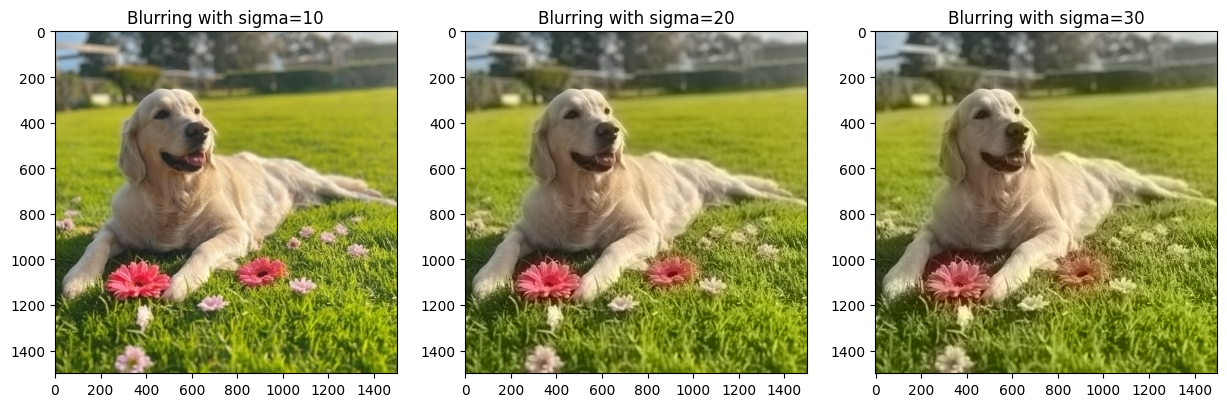

In [ ]:
plt.subplot(1,3,1)
plt.title('Blurring with sigma=10')
plt.imshow(compress_CbCr(im, 10))

plt.subplot(1,3,2)
plt.title('Blurring with sigma=20')
plt.imshow(compress_CbCr(im, 30))

plt.subplot(1,3,3)
plt.title('Blurring with sigma=30')
plt.imshow(compress_CbCr(im, 60))

This gradual increase in the sigma value helps better observe and compare the effects of compression, analyzing how the pink color of the flowers becomes progressively more muted and blurred around its edges, reducing the contrast between the warm and cool components (red-green). Similarly, the dog’s golden fur becomes more and more akin to a very light blonde. As higher sigma values are applied, even the green color of the grass begins to fade, turning into darker tones.

Finally, what can be observed is that, despite this compression, the information has been preserved, and the image remains largely unchanged, with only slight variations in the colors. Clearly, the higher the sigma of the Gaussian filter, the more pronounced the effect will be, especially in areas of high contrast, such as between the grass and the large pink flowers, where the blur becomes very pronounced and almost disruptive. It is essential to find the right balance in compression to account for high-contrast areas as well.

## **Blur Luma Component (Y)**

Now, the assignement requires to:

- **Convert to YCbCr color space**: Change the image from RGB to YCbCr to separate luminance (Y) from chrominance (Cb and Cr).
- **Blur only the Y channel**: Apply a blur to the **Y (luminance)** channel while leaving the **Cb** and **Cr (chrominance)** channels unchanged.
- **Visualize each channel**: Display the individual Y, Cb, and Cr channels, and then rebuild the image by combining the blurred Y channel with the original Cb and Cr to see the final result in RGB.

So, the same steps as previous, but now focus on blurring only the luminance Y channel.

For blurring the Y channel, use again the `gaussian_filter` function of [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html) API:

In [ ]:
from scipy.ndimage import gaussian_filter

In [ ]:
def compress_Y(im, sigma):
  # YCbCr Conversion
  im_YCbCr = color.rgb2ycbcr(im[:,:,0:3])

  # Components Decomposition
  Y = im_YCbCr[:,:,0]
  CbCr = im_YCbCr[:,:,1:]

  # Compose Blurred Image
  im_blur = np.dstack((gaussian_filter(Y, sigma), # Apply Gaussian Filter on Y component
                      CbCr))

  # Convert YCbCr to RGB
  im_out = color.ycbcr2rgb(im_blur)

  # Correction
  im_out = np.clip(im_out, 0, 1)

  return im_out

The `compress_Y` function is designed to **blur the luminance component** (Y) of an image while keeping the color information (Cb and Cr) intact. Here’s a step-by-step breakdown of what the function does:

1. **Convert RGB to YCbCr**:  
   The input image (`im`) is converted from the RGB color space to the YCbCr color space, which separates brightness (Y) from color information (Cb and Cr).

2. **Decompose Components**:  
   The YCbCr image is split into its three components: **Y** (luminance or brightness), and the combined **CbCr** (chrominance components, containing Cb and Cr).

3. **Apply Gaussian Blur to the Y Channel**:  
   A **Gaussian filter** with a specified `sigma` value is applied **only to the Y channel** (luminance). This blurs the brightness details, making the image appear softer or less sharp in terms of brightness. The **Cb and Cr** channels remain unchanged to preserve the color information.

4. **Rebuild the YCbCr Image**:  
   The blurred Y channel is recombined with the original Cb and Cr channels to form a modified YCbCr image.

5. **Convert Back to RGB**:  
   The modified YCbCr image is converted back to the RGB color space to produce the output image (`im_out`), where the brightness has been blurred but the colors remain sharp.

6. **Clip Values**:  
   The output image is clipped to ensure all pixel values are within the valid range [0, 1], avoiding potential issues or warning as the following:

        WARNING:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

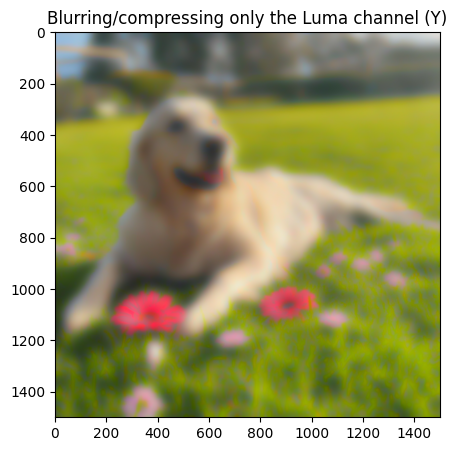

In [ ]:
im_yblur = compress_Y(im, 20)
plt.title('Blurring/compressing only the Luma channel (Y)')
plt.imshow(im_yblur)

When applying a Gaussian filter with the same sigma value used in the function for compressing only the chrominance components, the result is much more noticeable. The **entire image** becomes **significantly blurred**, making the details of objects almost imperceptible, but at the same time, it brings out the overall shapes and general composition. For a clearer comparison, it’s useful to place the original image next to the one blurred on the Y component.

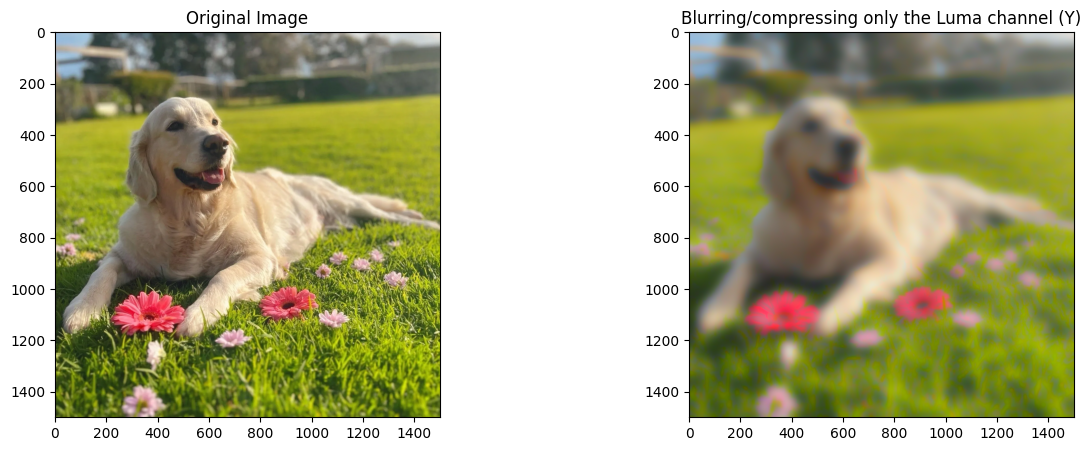

In [ ]:
# Print the original image
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(im)

# Print the blurred image
plt.subplot(1,2,2)
plt.title('Blurring/compressing only the Luma channel (Y)')
plt.imshow(im_yblur)

It is clearly observable how the **loss of detail** makes the **image** appear **less defined**, with the contours of objects still visible but much more blurred. The overall effect results in an image characterized by large color patches, where the separation between different areas is less distinct.

The **colors appear more vivid and uniform**: the larger flowers seem almost highlighted, while even the smaller flowers take on more intense shades of pink, contrasting sharply with the effect achieved by compressing the Cb and Cr components. The dog's tongue, which previously appeared more muted and greyish, is now a bright pink, similar to the flowers. The dog's fur has become more yellow and luminous, with a reduced perception of the shadows that previously made it look more natural.

This effect is caused by the **reduction in contrast**: by blurring the Y (luminance) component, finer details and light variations that provided depth to the image are removed. The result is a perception of brighter, more uniform and sature colors, but with a loss of depth and realism.

Now, visualize a 2x2 window, displaying the blurred image decomposed in its YCbCr components.

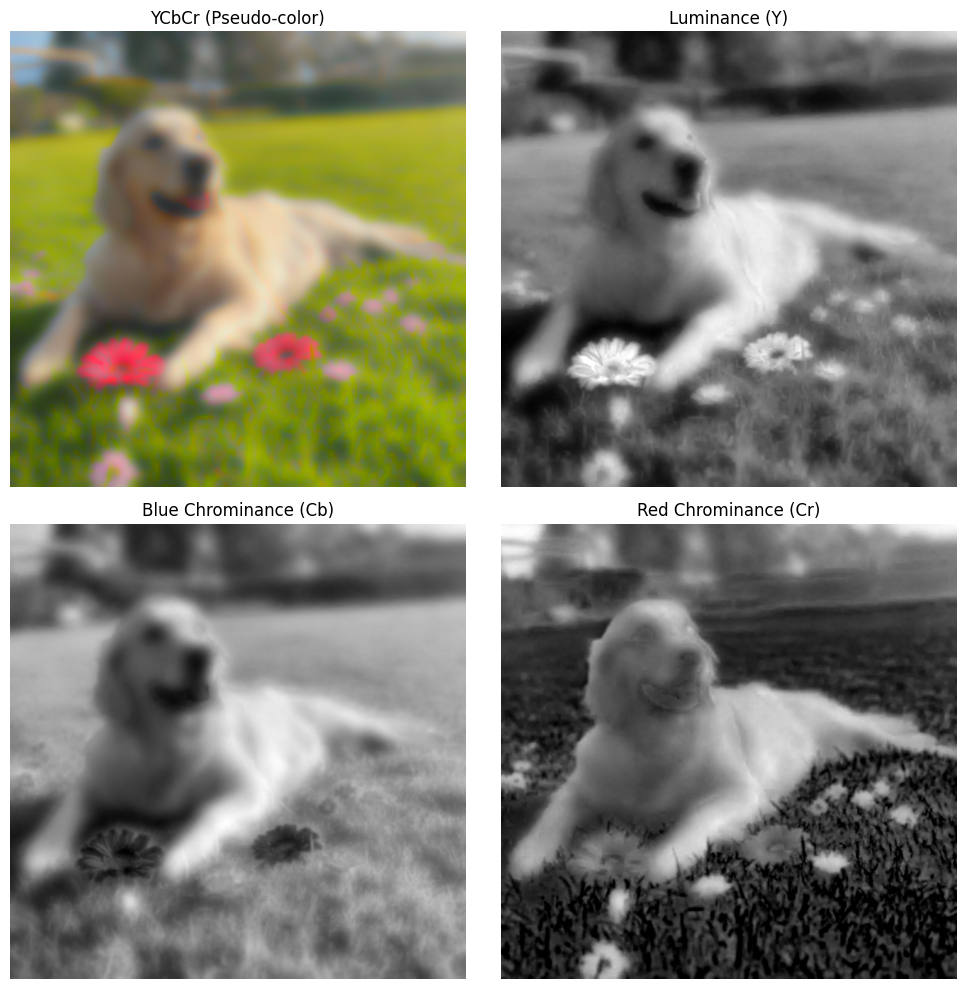

In [ ]:
# Separate channels
Y_channel = im_yblur[:, :, 0]
Cb_channel = im_yblur[:, :, 1]
Cr_channel = im_yblur[:, :, 2]

# Display the YCbCr image (pseudo-color)
plt.figure(figsize=(10, 10))

# Pseudo-color full YCbCr image
plt.subplot(2, 2, 1)
plt.imshow(im_yblur)
plt.title("YCbCr (Pseudo-color)")
plt.axis("off")

# Display Y channel
plt.subplot(2, 2, 2)
plt.imshow(Y_channel, cmap='gray')
plt.title("Luminance (Y)")
plt.axis("off")

# Display Cb channel
plt.subplot(2, 2, 3)
plt.imshow(Cb_channel, cmap='gray')
plt.title("Blue Chrominance (Cb)")
plt.axis("off")

# Display Cr channel
plt.subplot(2, 2, 4)
plt.imshow(Cr_channel, cmap='gray')
plt.title("Red Chrominance (Cr)")
plt.axis("off")

plt.tight_layout()
plt.show()

Starting with the Y channel, on which a Gaussian filter was applied, the blurring of the image is evident. With this sigma value, the **blur disrupts visual perception**, making some areas appear almost "doubled," particularly when focusing on the dog's muzzle. As analyzed in the previous step, the filter has minimal impact on color (since the Cb and Cr channels are unchanged) but s**ignificantly affects the definition** of the image. Uniform areas, such as the background, are the most affected, with much of the grass structure's information lost. The dog, while retaining a general perception of its shape, still loses important details, whereas the large pink flowers remain more defined compared to the rest of the image, thanks to their strong chromatic contrast with the background.

Analyzing the impact of Y channel compression on the individual channels:
- **Effect on the Cb Channel**: In the Cb channel, a more generalized loss of detail can be observed. The entire image appears almost uniform, with details blending into a continuous "canvas" of gradients. This occurs because the Cb component primarily captures cool chrominances (blue and green), which are predominant in the analyzed image. However, the two pink flowers in the foreground remain visible and distinct because warm chrominances (including pink) are not as emphasized as the cool tones. The dog's blonde fur appears lighter in this channel, gradually blending into the surrounding green grass, contributing to the blurring effect and the loss of definition between the dog and the background.
- **Effect on the Cr Channel**: In the Cr channel, the contrast is more evident compared to the Cb channel. The smaller flowers with warmer tones are clearly visible against the background, although they lose detail and become blurred spots due to the Y channel blurring. Additionally, the contrast between the green grass and the dog's blonde fur is more pronounced in the Cr channel, as this component captures the differences between red and green chrominances. This leads to better definition of the dog's outline compared to the Cb channel, even though fine details (such as the muzzle) are lost. The grass shows more pronounced internal contrasts in the Cr channel, with darker and lighter areas that provide some structure, albeit without depth.

Try to apply different values of sigma within the gaussian filter, using the slider:

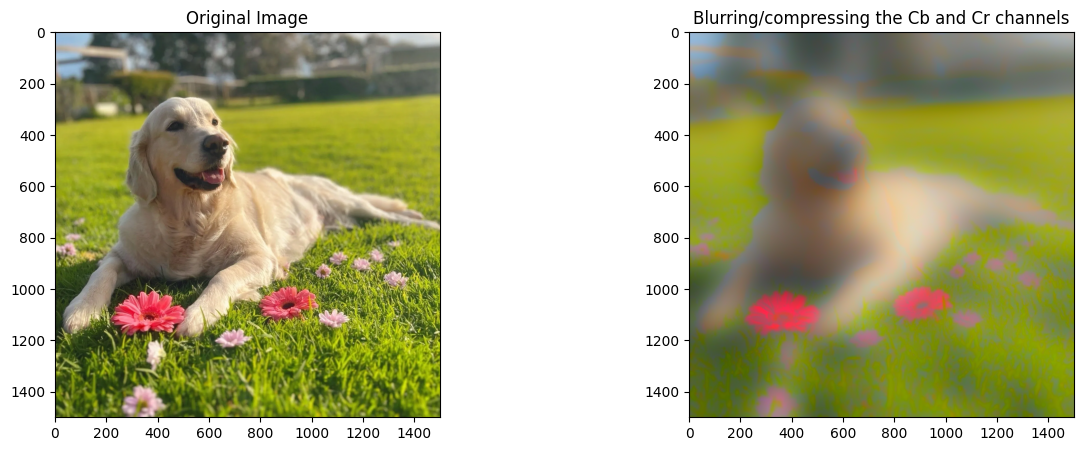

In [ ]:
# @title  {"run":"auto"}
# Blur image
sigma = 57 #@param {type:"slider", min:0, max:60, step:3}
plt.subplot(1,2,2)
plt.title('Blurring/compressing the Cb and Cr channels')
plt.imshow(compress_Y(im, sigma))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(im)

Then, a sequence of the same images with increasing values of sigma:

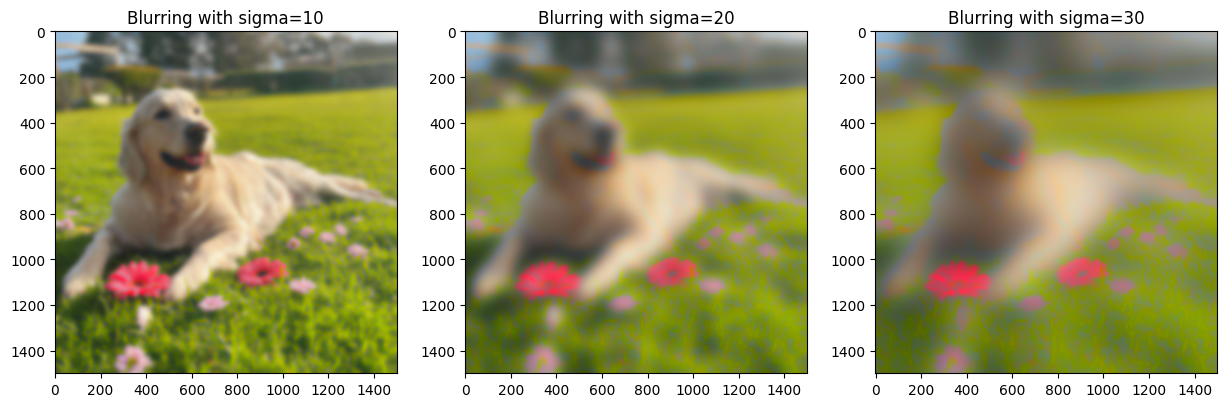

In [ ]:
plt.subplot(1,3,1)
plt.title('Blurring with sigma=10')
plt.imshow(compress_Y(im, 10))

plt.subplot(1,3,2)
plt.title('Blurring with sigma=20')
plt.imshow(compress_Y(im, 30))

plt.subplot(1,3,3)
plt.title('Blurring with sigma=30')
plt.imshow(compress_Y(im, 60))

Increasing the sigma value, the blurring effect becomes progressively more pronounced, gradually blending the elements of the image. However, an *interesting aspect* is that the **colors tend to become more saturated**. Despite a significant loss of detail in some areas, the **contours** of elements in **regions with contrasting colors** appear **paradoxically more accentuated**.

For example, the larger flowers become even more prominent against a background that is now almost devoid of details, while the silhouette of the dog appears, counterintuitively, more defined with a sigma value of 30 compared to sigma 20, particularly in the rear part of its body. Even the smaller flowers stand out more, and in the upper portion of the background, some edges emerge, although they do not reveal any meaningful details of the scene.

## **Conclusions**

Compared to compression applied exclusively to the chrominance components, where the impact on the definition of objects in the image was not invasive, compressing the luminance component (Y) has a much stronger effect. In addition to a substantial loss of image definition, there is also a noticeable impact on the colors, with an increase in saturation.

A key observation is that to achieve a **comparable level of compression**, the sigma value of the **Gaussian filter** applied to the chrominance components (**Cb and Cr**) must be significantly **higher than the one required for** compressing the luminance component (**Y**). This highlights the crucial role of the Y component in defining details and in the overall perception of the image.